In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [6]:
# Reflect an existing database into a new model
Base = automap_base()

In [7]:
# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
meas = Base.classes.measurement

In [10]:
stat = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(meas.date).order_by(meas.date.desc()).first()


('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(meas.prcp).\
    filter(meas.date < '2017-08-23').\
    order_by(meas.date).limit(366).all()

[(0.08,),
 (0.28,),
 (0.21,),
 (0.15,),
 (0.15,),
 (0.05,),
 (0.14,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (0.02,),
 (0.11,),
 (0.01,),
 (0.08,),
 (0.36,),
 (0.06,),
 (0.38,),
 (None,),
 (0.7,),
 (0.17,),
 (0.04,),
 (0.3,),
 (0.0,),
 (0.01,),
 (0.03,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.03,),
 (0.14,),
 (0.48,),
 (0.03,),
 (0.05,),
 (0.14,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),

In [14]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
year_ago


datetime.date(2016, 8, 22)

In [15]:
# Perform a query to retrieve the date and precipitation scores
prcp_score= pd.read_sql("SELECT date AS Date, prcp AS Precipitation FROM measurement WHERE date BETWEEN '2016-08-22' AND '2017-08-23'", conn)
prcp_score

,Date,Precipitation
0,2016-08-22,0.40
1,2016-08-23,0.00
2,2016-08-24,0.08
3,2016-08-25,0.08
4,2016-08-26,0.00
...,...,...
2232,2017-08-19,0.09
2233,2017-08-20,NaN
2234,2017-08-21,0.56
2235,2017-08-22,0.50


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_score, columns=['Precipitation','Date'])
prcp_df

# Sort the dataframe by date
prcp_df_index=prcp_df.set_index('Date')
prcp_df_index

,Precipitation
Date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


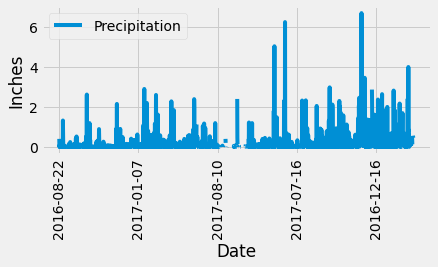

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(prcp_score)
df.set_index('Date', inplace=True)
prcp_df_index.plot(rot=90)
plt.tight_layout()
plt.ylabel("Inches")
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_score.describe()

,Precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_count=pd.read_sql("SELECT station FROM station GROUP BY station", conn)
station_count

,station
0,USC00511918
1,USC00513117
2,USC00514830
3,USC00516128
4,USC00517948
5,USC00518838
6,USC00519281
7,USC00519397
8,USC00519523


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_reports=pd.read_sql("SELECT station, COUNT (station) AS report_count FROM measurement GROUP BY station ORDER BY COUNT (station) DESC", conn)
station_reports


,station,report_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_USC00519281=pd.read_sql("SELECT MIN (prcp) AS lowest_prcp, MAX (prcp) AS highest_prcp, AVG (tobs) AS avg_temp FROM measurement WHERE station = 'USC00519281'", conn)
station_USC00519281

,lowest_prcp,highest_prcp,avg_temp
0,0.0,9.64,71.663781


In [22]:
# Report of the most active station 
station_summary=pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281' ", conn)
station_summary

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
2767,14955,USC00519281,2017-08-14,0.00,77.0
2768,14956,USC00519281,2017-08-15,0.32,77.0
2769,14957,USC00519281,2017-08-16,0.12,76.0
2770,14958,USC00519281,2017-08-17,0.01,76.0


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
station_USC00519281_2017=pd.read_sql("SELECT tobs AS temp FROM measurement WHERE station = 'USC00519281' AND date BETWEEN '2016-08-18' AND '2017-08-18' ", conn)
station_USC00519281_2017


,temp
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0
...,...
352,77.0
353,77.0
354,76.0
355,76.0


array([[<AxesSubplot:title={'center':'temp'}>, <AxesSubplot:>,
        <AxesSubplot:>, ..., <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       ...,
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

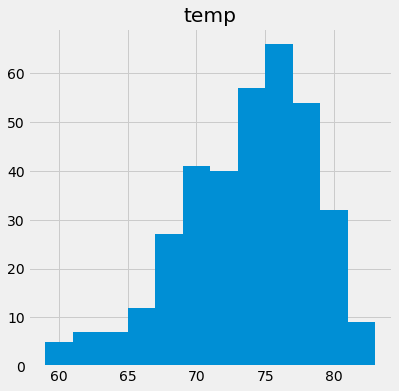

In [24]:
# Plot the results as a histogram
station_USC00519281_2017.hist(figsize=(300,300), bins=12, layout=(40,40))

# Close session

In [25]:
# Close Session
session.close()